In [25]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
sns.set()

In [26]:
properties = pd.read_csv("properties_v2.csv", sep=",") 
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [27]:
properties.describe()
total_properties = properties["price"].count()

# Removendo outliers de preços

In [28]:

properties = properties.loc[(properties["price"] >= 500)]
properties = properties[np.abs(zscore(properties["price"])) < 2.5]

properties["price"].describe()


count     9589.000000
mean      3084.938993
std       3942.898482
min        500.000000
25%       1000.000000
50%       1500.000000
75%       3200.000000
max      29000.000000
Name: price, dtype: float64

<AxesSubplot:>

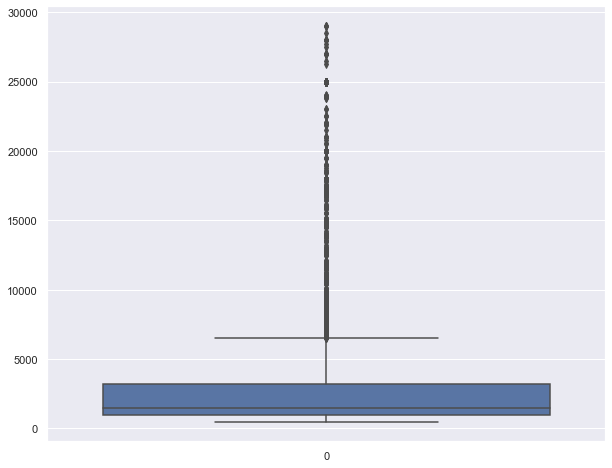

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=properties["price"], ax=ax)


# Removendo outliers de área

In [39]:
properties = properties.loc[properties["area"] != 0]
properties = properties[np.abs(zscore(properties["area"])) < 2]

properties["area"].describe()

count    9401.000000
mean      113.275077
std       132.300167
min         1.000000
25%        40.000000
50%        62.000000
75%       120.000000
max       870.000000
Name: area, dtype: float64

<AxesSubplot:>

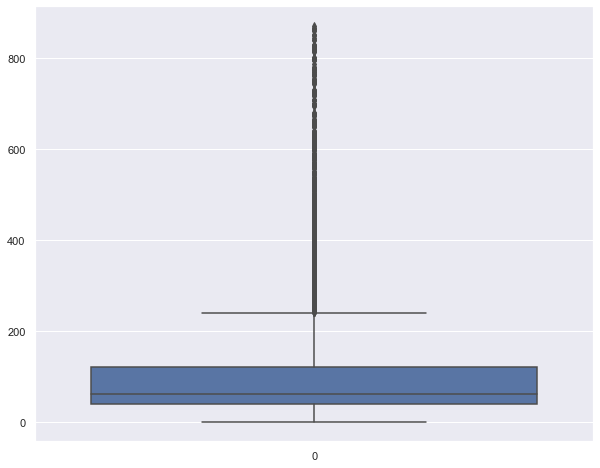

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=properties["area"], ax=ax)

In [41]:
print("Total de outliers filtrados: ",round((1-(properties["price"].count()/total_properties))*100,2),"%")


Total de outliers filtrados:  5.0 %


# Entendendo correlações

<AxesSubplot:>

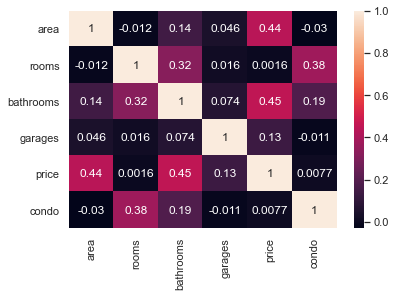

In [33]:
sns.heatmap(properties[["area","rooms","bathrooms","garages","price","condo"]].corr(), annot=True)


Text(0.5, 1.0, 'Area vs Price')

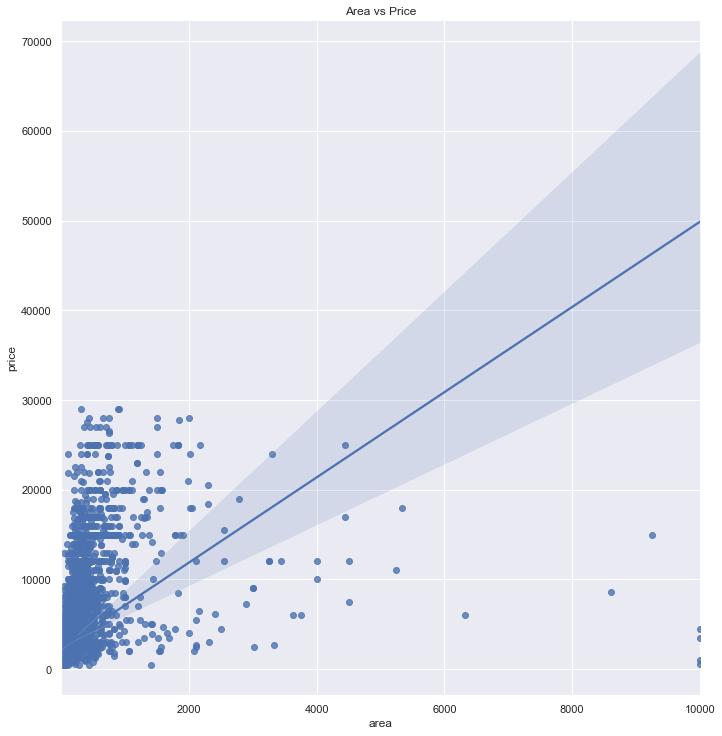

In [34]:
#prices_by_neighborhood = properties.groupby(['neighbourhood'])['price'].count()
#prices_by_neighborhood = prices_by_neighborhood.reset_index()


sns.lmplot(x='area', y='price', data=properties, height=10)
ax = plt.gca()
ax.set_title("Area vs Price")


# Verificando distribuições numéricas

<AxesSubplot:xlabel='price', ylabel='Count'>

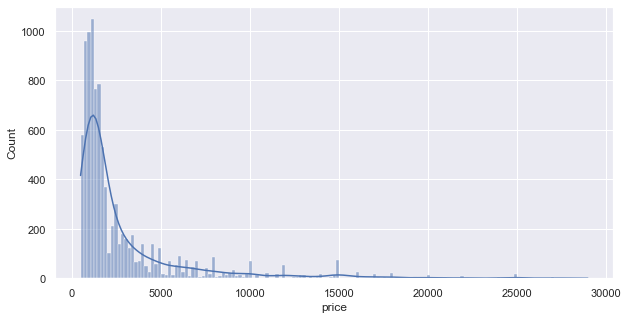

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=properties, x="price", kde=True, ax=ax)

<AxesSubplot:xlabel='area', ylabel='Count'>

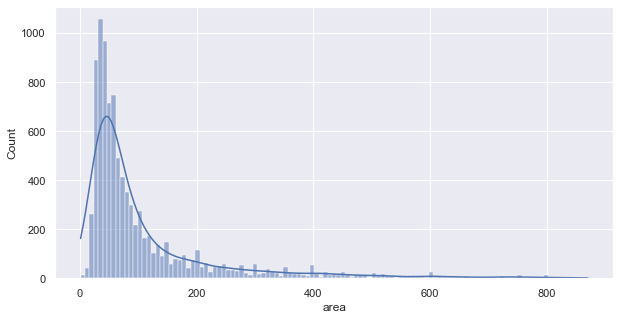

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=properties, x="area", kde=True, ax=ax)

In [37]:
#outiliers condominio
#properties = properties[np.abs(zscore(properties["condo"])) < 3]
#sns.histplot(data=properties, x="condo", kde=True)

<AxesSubplot:title={'center':'Number of apartments vs neighbourhood'}, xlabel='count', ylabel='neighbourhood'>

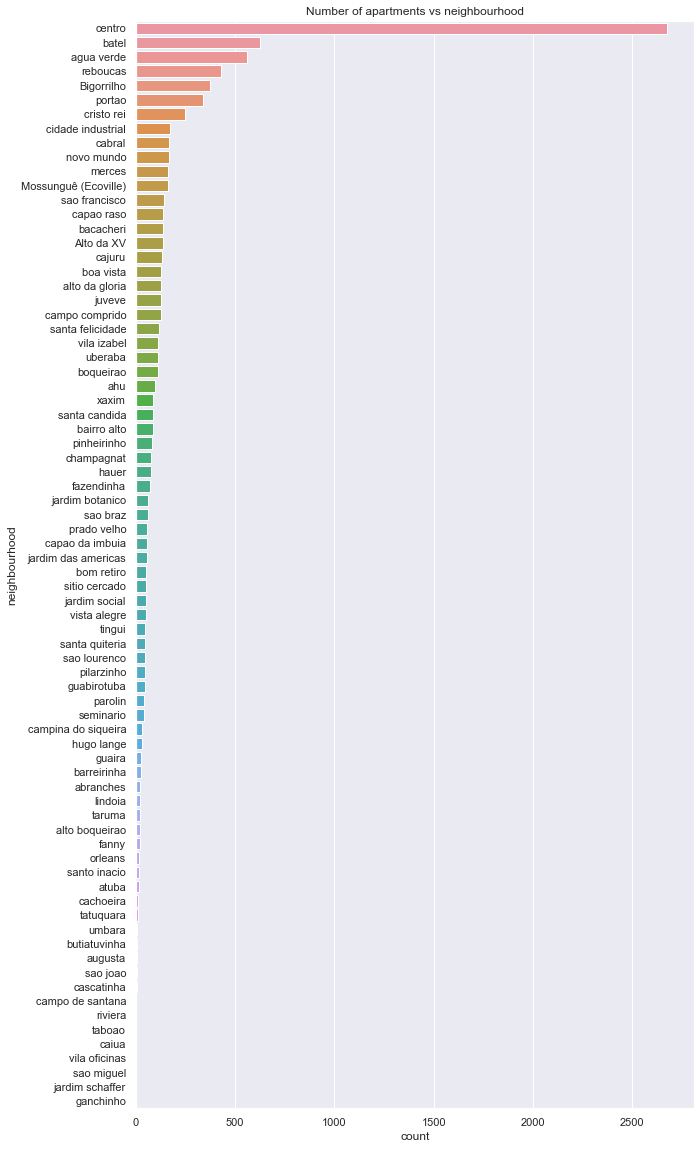

In [38]:
fig, ax = plt.subplots(figsize=(10,20))
ax.set_title("Number of apartments vs neighbourhood")
sns.countplot(data=properties, y="neighbourhood", ax=ax, order=properties['neighbourhood'].value_counts().index)